# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤRain Prediction Preprocessing

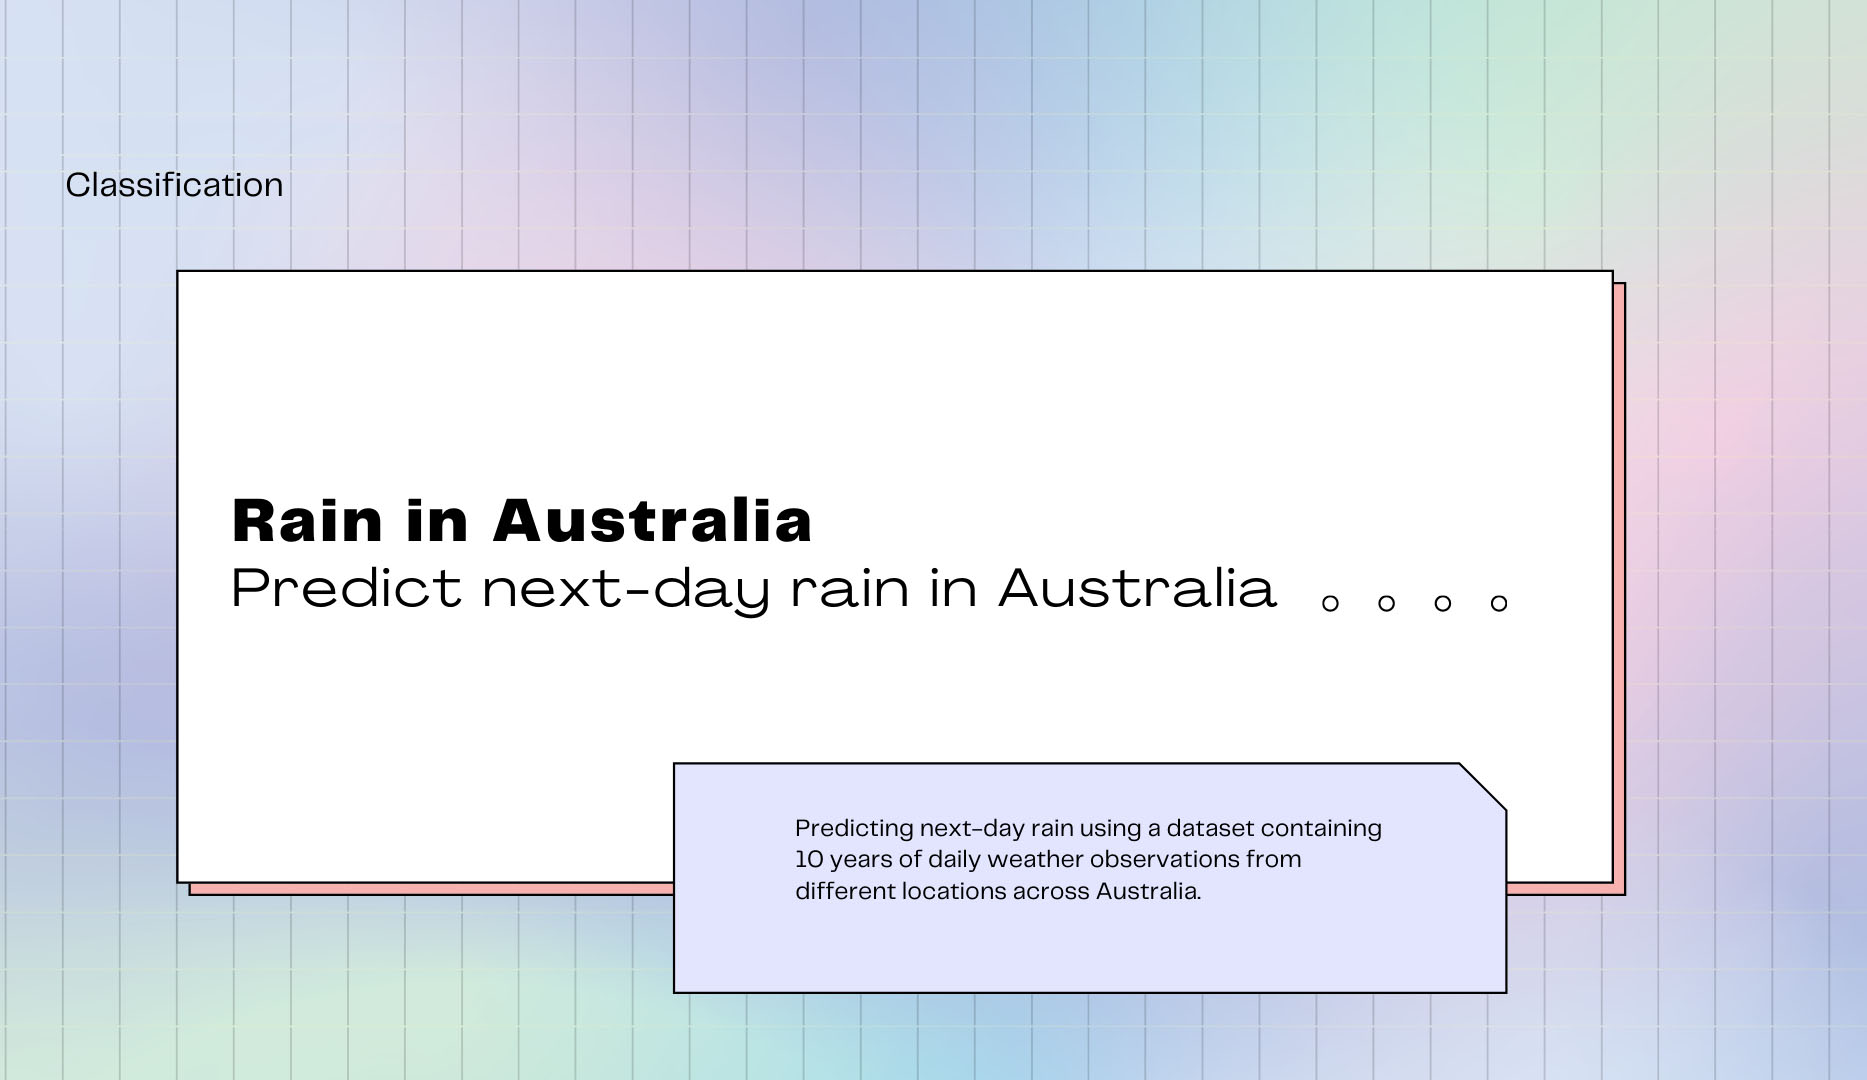

<a id='part1'></a>
# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤPart 1

***

## Table of Contents
[Part I](#part1)
 - [1.Import Libiraries](#libiraries)
 - [2.Import Dataset](#dataset)
 - [3.Data Wrangling](#wrangling)
 - [4.Univariate Analysis](#univariante_analysis)
 - [5.Explore Categorical Variables](#categorical)
 - [6.Explore Numerical Variables](#numerical)
 - [7.Data Visalization](#visualization)
 - [8.Multivariante Analysis](#multivariante_analysis)
 - [9.Feature Engineering](#feature_eng)
 - [9.Applying discretization on numeric data](#discretization)
 
[Part II](#part2)
 - [1.Feature Encoding](#encoding)
 - [2.Data Modelling](#modelling)
 - [3.KNN](#knn)
 - [4.Decision Tree](#decisiontree)
 - [5.Naïve Bayes](#naive)
 - [6.Hyperparameters Tuning](#hyperparameters-tuning)

Rain is an essential part for our life. Clouds give the gift of rain to humans. Meteorological Authority tries to forecast when will it rain. So, I will try to predict whether it will rain in Australia tomorrow or not.

Hence, in this notebook, I will implement Classification model with Python using Scikit-Learn and build a classifier to predict whether or not it will rain tomorrow in Australia. I will use the rain in Australia dataset for this project.

<a id='libiraries'></a>
##  Import Libraries

In [1]:
import numpy as np # Numerical Computations
import pandas as pd # Data Preprocessing

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<a id='dataset'></a>
##  Import Dataset

In [2]:
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

<a id='wrangling'></a>
##  Data Wrangling

- we have imported the data.
- now, its time to explore the data to gain insights about it.

### Preview dataset

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### View dimention of dataset

In [4]:
df.shape

(145460, 23)

we can see that there are 145460 row and 23 columns in the dataset

### View column names

In [5]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Checking For datatypes of the attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Comment
- We can see that the dataset contains mixture of categorical and numerical variables.
- Categorical variables have data type : object
- Numerical variables have data type : float64
- Also, there are missing values in data set, we will explore it later.


### View statistical properties of dataset

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<a id='univariante_analysis'></a>
##  Univariate Analysis

Explore **RainTomorrow** Target variable

#### Check for missing values 

In [8]:
df['RainTomorrow'].isnull().sum()

3267

We can see that there are 3267 missing values in "RainTomorrow"

#### Check for unique values

In [9]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

#### View the frequency of values 

In [10]:
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

Important points to note
- There are 3267 "NaN" missing values
- There are 31877 "Yes" that it will rain
- there are 110316 "No" that it wont rain 

### View percentage of frecquency values 

In [11]:
rain = df.RainTomorrow.fillna('null value').value_counts(normalize=True)
rain

No            0.758394
Yes           0.219146
null value    0.022460
Name: RainTomorrow, dtype: float64

Hence
- We can see that the total number of rain tomorrow value : No = 76% 
- We can see that the total number of rain tomorrow value : Yes = 22%
- We can see that the total number of rain tomorrow value : Missing values = 2%     

### Visualize frequency distribution of RainTomorrow variable

In [12]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652722975843' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainTomorrowFrequencies&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RainTomorrowFrequencies&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainTomorrowFrequencies&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652722975843');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

<a id='categorical'></a>
### Explore Categorical Variables

Showing categorical variables in dataset

In [13]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


 Summary of categorical variables 
 - There are 6 categorical variables. They are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow
 - There are two binary categorical variables - RainToday and RainTomorrow
 - RainTomorrow is the target variable.

### Missing values in Categorical Variables

In [14]:
categorical.isna().sum().to_frame('number of null values')

,number of null values
Date,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


#### Number of labels: cardinality

>The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may causes some serious problems in the machine learning model. So, I will check for high cardinality.

In [15]:
# Check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', df[var].nunique(), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


We can see that there is a Date variable which needs to be preprocessed. I will preprocess in the following section.

All the other variables contain relatively smaller number of variables.

#### Feature Engineering of Date Variable

In [16]:
# Convert date to Datetime datatype

df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Separate date feature to 3 attributes

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [18]:
# Final check
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


#### Explore Categorical Variables one by one 

In [19]:
new_categorical = df.select_dtypes(include=['object'])
new_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


****

In all variables :
- I will check number of labels and show it.
- Convert categorical variable into dummy/indicator variables.

<a id='numerical'></a>
### Explore Numerical Variables 

In [20]:
Numerical = df.select_dtypes(include=['float64','int'])
Numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [21]:
Numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

### Check for duplicated values

In [22]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day


> Data does not contain any duplicates between attributes

### Missing values in numerical variables

In [23]:
Numerical.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

### Check summary statistics

In [24]:
Numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


<a id='visualization'></a>
# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤData Visualization

## Locations Frequencies

In [25]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652712003286' style='position: relative'><noscript><a href='#'><img alt='RainFall Per Location ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RainFallinLocations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652712003286');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

Here, We took an overview on the average amount of rainfall for each city in Australia and the frequency of each rainfall.

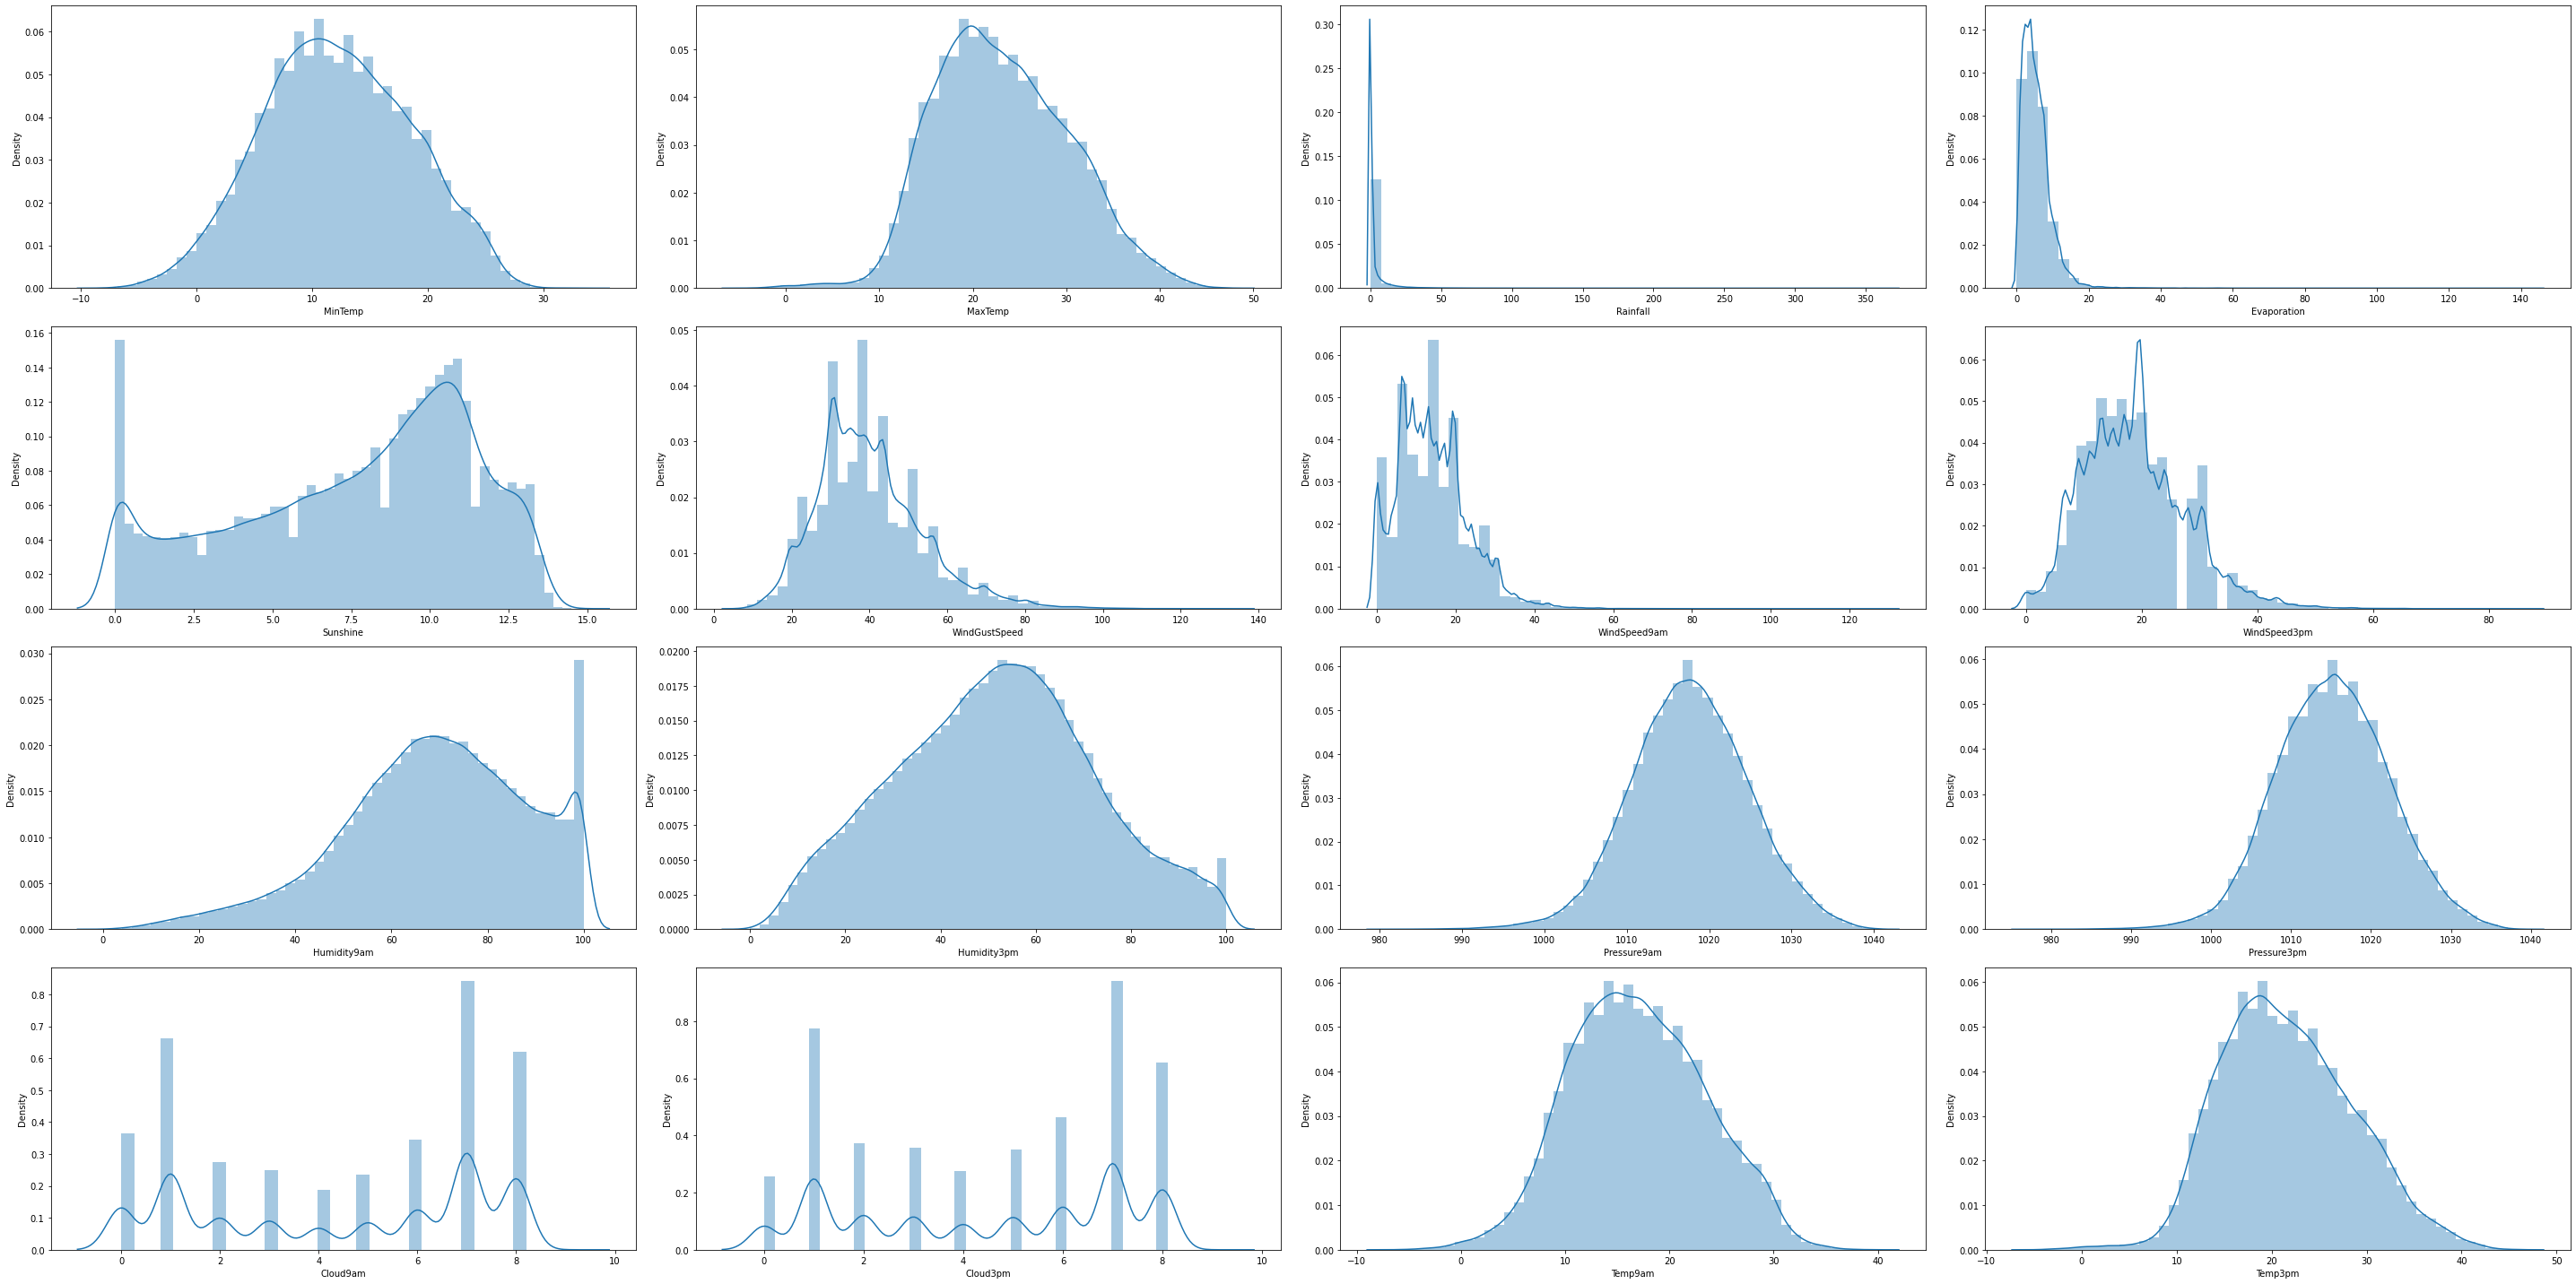

In [26]:
#  plot Numerical Data

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(40,20))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.distplot(df[i])
        c = c+1
    else:
        continue
        
plt.tight_layout()
plt.show()       

## Date Plot

We are going to plot features with datetime. Here, I am going to use date from last 3 years.

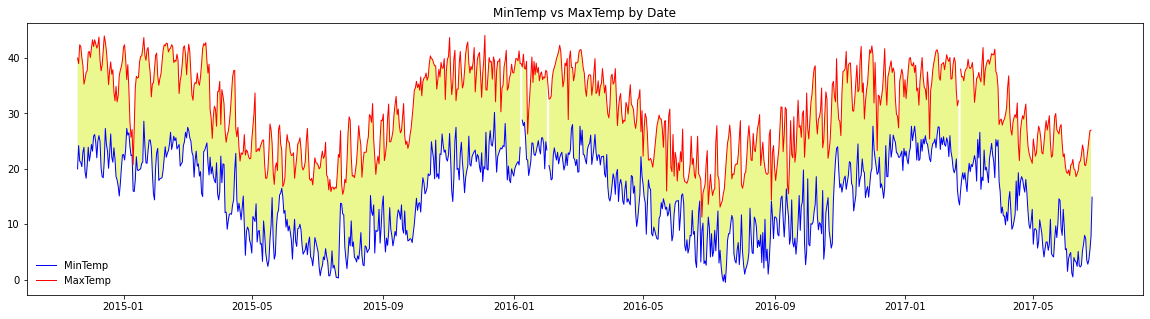

In [27]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

- Above plot shows that the MinTemp and MaxTemp relatively increases and decreases every year.
- The weather conditions are always opposite in the two hemispheres. As, the Australia is situated in the southern hemisphere. The seasons are bit different.
- As you can see that, December to February is summer; March to May is autumn; June to August is winter; and September to November is spring.

### WindGustSpeed

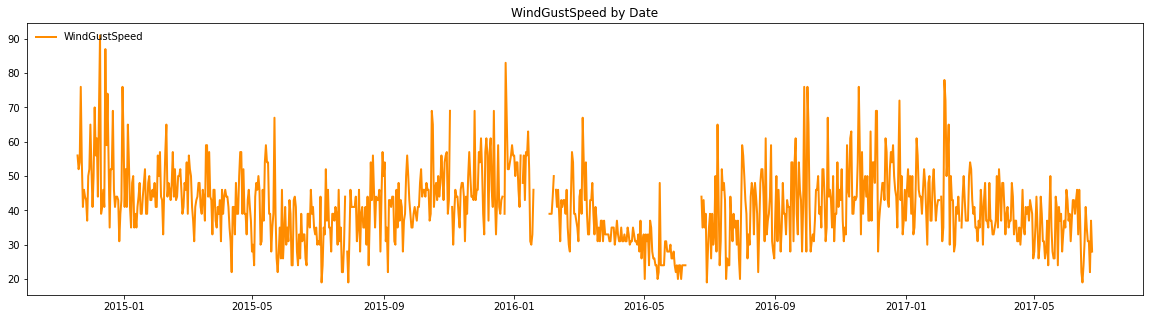

In [28]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'], df_dateplot['WindGustSpeed'], color='darkorange', linewidth=2, label='WindGustSpeed')
plt.legend(loc='upper left', frameon=False)
plt.title('WindGustSpeed by Date')
plt.show()

### Pressure9am and Pressure3am 

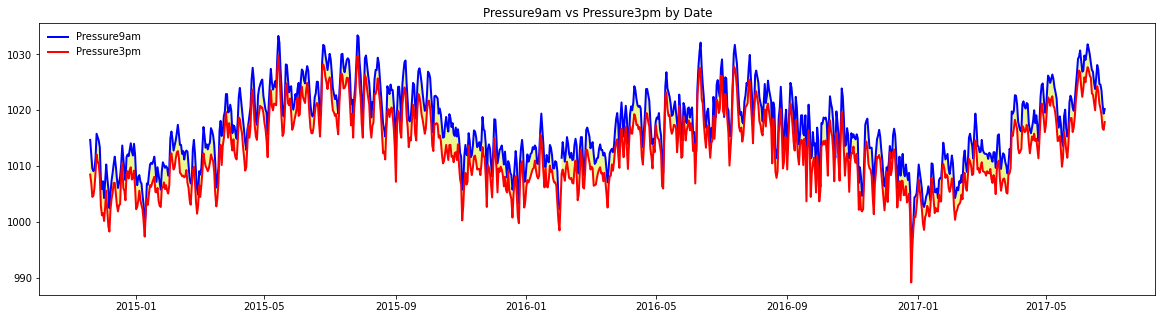

In [29]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Pressure9am'],color='blue', linewidth=2, label= 'Pressure9am')
plt.fill_between(df_dateplot['Date'],df_dateplot['Pressure9am'],df_dateplot['Pressure3pm'], facecolor = '#EBF78F')
plt.plot(df_dateplot['Date'],df_dateplot['Pressure3pm'],color='red', linewidth=2, label= 'Pressure3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('Pressure9am vs Pressure3pm by Date')
plt.show()

We can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualize outliers in the above variables.

## Outliers Detection

- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- We are using Boxplot to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier. This is also known as “Univariate method” as here we are using one variable outlier analysis.

We can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

In [30]:
# Remove date

df.drop('Date',inplace= True,axis=1)

In [31]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652724172312' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;Weather_16526360468760&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Weather_16526360468760&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;We&#47;Weather_16526360468760&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652724172312');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

### Find all  outliers

In [32]:
# Find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Rainfall outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for Evaporation variable
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Evaporation outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed9am variable
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed9am outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed3pm variable
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed3pm outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindGustSpeed variable
IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindGustSpeed outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

-1.20 > Rainfall outliers are values > 2.00
-4.60 > Evaporation outliers are values > 14.60
-11.00 > WindSpeed9am outliers are values > 37.00
-3.50 > WindSpeed3pm outliers are values > 40.50
5.50 > WindGustSpeed outliers are values > 73.50


Important point to note :
- For Rainfall, the minimum and maximum values are 0.0 and 371.0 So, the outliers are values > 2.0
- For Evaporation, the minimum and maximum values are 0.0 and 145.0 So, the outliers are values > 14.6
- For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0 So, the outliers are values > 37.0
- For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0 So, the outliers are values > 40.5
- For WindGustSpeed, the minimum and maximum values are 6.0 and 135.0 So, the outliers are values > 73.5

************

<a id='multivariante_analysis'></a>
## Multivariante Analysis 

- An important step in EDA is to discover patterns and relationships between variables in the dataset.

- I will use heatmap and pair plot to discover the patterns and relationships in the dataset.

- First of all, I will draw a heatmap.

In [33]:
correlation = df.corr()

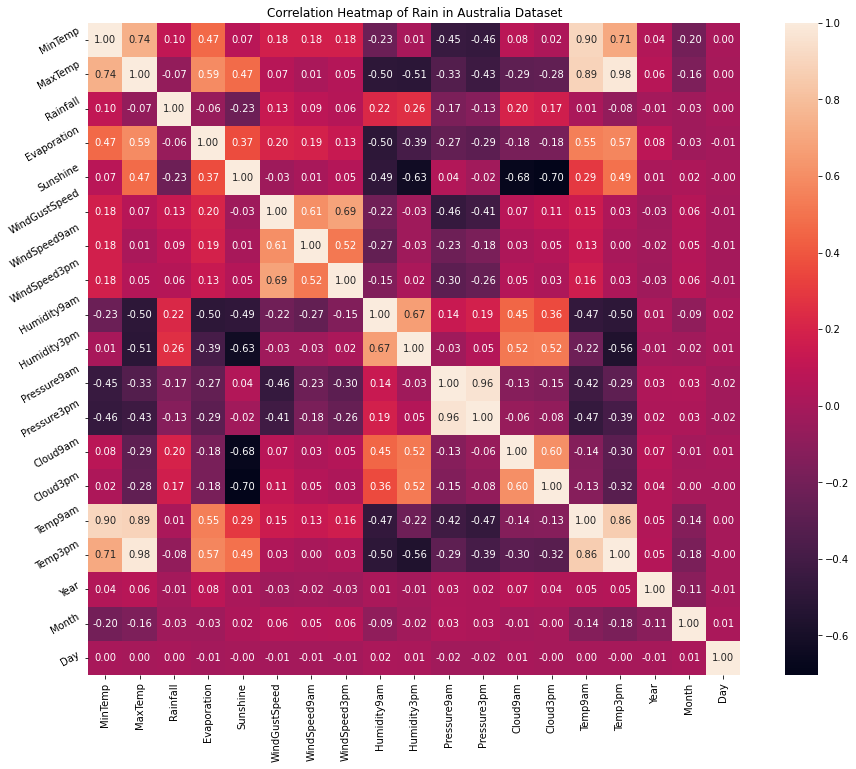

In [34]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation

- From the above correlation heatmap, we can conclude that:


ㅤㅤㅤ- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).


ㅤㅤㅤ- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).


ㅤㅤㅤ- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).


ㅤㅤㅤ- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).


ㅤㅤㅤ- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).


ㅤㅤㅤ- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).


ㅤㅤㅤ- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).


ㅤㅤㅤ- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86)

### Remove correlated attributes 

> Remove 'Temp9am', 'Temp3pm', 'Pressure3pm' as this columns are irrelevant attributes

In [35]:
df.drop(['Temp9am','Temp3pm','Pressure3pm'],inplace= True,axis=1)

### Show columns  

In [36]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

#### Show New Data after
    - Remove duplicate records
    - Remove irrelevant attributes
    - Remove correlated attributes

In [37]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,8.0,NaN,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,NaN,NaN,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,NaN,2.0,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,NaN,NaN,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,7.0,8.0,No,No,2008,12,5


- We found that shape of dataset after remove noise data have 22 columns

<a id='feature_eng'></a>
# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤFeature Engineering

***

## Declare feature vector and target variable

**Feature Engineering** is the process of transforming raw data into useful features that help us understand our model better and increase its predictive power.
<br>
I will carry out feature engineering on different types of variables.

First, I will display categorical and numerical variables again separately.

In [38]:
# Display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [39]:
# Display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Year',
 'Month',
 'Day']

### Missing values in numerical variables

In [40]:
# Checking on missing values in numerical variables in X_train

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Year                 0
Month                0
Day                  0
dtype: int64

In [41]:
# Impute missing values in X_train and X_test with respective column median in X_train

for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [42]:
# Check again missing values in numerical variables in X_train

df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Year             0
Month            0
Day              0
dtype: int64

In [43]:
# Impute missing categorical variables with most frequent value
for col in categorical:
    col_mode=df[col].mode()[0]
    #print(col_mode)
    df[col].fillna(col_mode, inplace=True) 

In [44]:
# Check missing values in categorical variables in X_train
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Outliers Engineering in numerical variables 

We have seen that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.
<br>
I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [45]:
for i in df:
    if df[i].dtype=='float64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df[i])
        for j in df[i]:
            if j > Upper_tail or j < Lower_tail:
                df[i] = df[i].replace(j, med)
    else:
        continue

In [46]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

<a id='discretization'></a>
# Applying discretization on numeric data

In [47]:
# Main smoothing cell
# Applying discretication on numeric data

for col in numerical:
    print(col, end=' ')
    percentiles = list(df[col].describe()[3:])
    print(percentiles)
    for b in range(4):
        binn = df[col].between(percentiles[b], percentiles[b+1], inclusive='left')
        bin_mean = df[binn][col].mean()
        df.loc[binn, col] = bin_mean

MinTemp [-5.9, 7.7, 12.0, 16.8, 30.3]
MaxTemp [2.8, 18.0, 22.6, 28.1, 43.5]
Rainfall [0.0, 0.0, 0.0, 0.0, 1.5]
Evaporation [2.2, 4.8, 4.8, 4.8, 7.0]
Sunshine [7.5, 8.4, 8.4, 8.4, 9.4]
WindGustSpeed [9.0, 31.0, 39.0, 44.0, 67.0]
WindSpeed9am [0.0, 7.0, 13.0, 19.0, 37.0]
WindSpeed3pm [0.0, 13.0, 19.0, 24.0, 39.0]
Humidity9am [18.0, 58.0, 70.0, 83.0, 100.0]
Humidity3pm [0.0, 37.0, 52.0, 65.0, 100.0]
Pressure9am [1001.1, 1013.8, 1017.6, 1021.6, 1034.2]
Cloud9am [0.0, 3.0, 5.0, 6.0, 9.0]
Cloud3pm [1.0, 5.0, 5.0, 6.0, 9.0]
Year [2007.0, 2011.0, 2013.0, 2015.0, 2017.0]
Month [1.0, 3.0, 6.0, 9.0, 12.0]
Day [1.0, 8.0, 16.0, 23.0, 31.0]


In [48]:
# Checking

for col in numerical:
    print(col, df[col].unique())

MinTemp [14.15432856  4.13471716  9.83066984 20.46282429 30.3       ]
MaxTemp [25.0506269  32.55346701 20.22992164 14.74096534 43.5       ]
Rainfall [0.0831257 1.5      ]
Evaporation [4.94532217 3.37767061 7.        ]
Sunshine [8.42551684 7.91641627 9.4       ]
WindGustSpeed [51.6074521  24.79419123 40.06784584 34.00413407 67.        ]
WindSpeed9am [23.60481437  3.09954218  9.0522677  14.68905557 37.        ]
WindSpeed3pm [28.3233484  20.00936516  8.06462756 14.99775969 39.        ]
Humidity9am [ 75.13713091  45.25781624  63.76788339  91.04329334 100.        ]
Humidity3pm [ 24.48573224  77.06422141  44.44172156  57.17401139 100.        ]
Pressure9am [1009.82737026 1018.74797887 1015.69726557 1025.67617643 1034.2       ]
Cloud9am [7.15233427 5.         0.93051996 3.42771434 9.        ]
Cloud3pm [5.         2.0751633  7.09235709 9.        ]
Year [2009.40081333 2011.50003245 2013.52142857 2015.50068399 2017.        ]
Month [12.          1.44916559  3.99979093  6.98214334 10.00082067]
Day 

<a id='part2'></a>
# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤPart 2

<a id='encoding'></a>
## Feature Encoding

In [49]:
# Unique values for locations

new_categorical['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [50]:
# Dummies of Locations

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore WindGustDir variable

In [51]:
# Unique values for WindGustDir

new_categorical['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [52]:
# Dummies of WindGustDir

pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Explore WindDir9am variable

In [53]:
# Unique values for WindDir9am

new_categorical['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [54]:
# Dummies of WindDir9am

pd.get_dummies(df.WindDir9am,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Explore WindDir3pm variable

In [55]:
# Unique values for WindDir3pm

new_categorical['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [56]:
# Dummies of WindDir3pm

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Explore RainToday variable

In [57]:
# Unique values for RainToday

new_categorical['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [58]:
# Count each value in RainToday feature

df.RainToday.value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [59]:
# Dummies for RainToday

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [60]:
# Spliting data to X and Y : Features and Target

X = df.drop(['RainTomorrow'], axis=1)
Y = df['RainTomorrow']

In [61]:
# Getting Dummies for Target feature

Y_dumies = pd.get_dummies(Y, drop_first=True)

In [62]:
# Encoding the Target feature

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_coded = encoder.fit_transform(X)

In [63]:
X_coded.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday_0,RainToday_1,Year,Month,Day
0,Albury,14.154329,25.050627,0.083126,4.945322,8.425517,W,51.607452,W,WNW,...,75.137131,24.485732,1009.827370,7.152334,5.000000,0,1,2009.400813,12.0,4.0
1,Albury,4.134717,25.050627,0.083126,4.945322,8.425517,WNW,51.607452,NNW,WSW,...,45.257816,24.485732,1009.827370,5.000000,5.000000,0,1,2009.400813,12.0,4.0
2,Albury,14.154329,25.050627,0.083126,4.945322,8.425517,WSW,51.607452,W,WSW,...,45.257816,24.485732,1009.827370,5.000000,2.075163,0,1,2009.400813,12.0,4.0
3,Albury,9.830670,25.050627,0.083126,4.945322,8.425517,NE,24.794191,SE,E,...,45.257816,24.485732,1018.747979,5.000000,5.000000,0,1,2009.400813,12.0,4.0
4,Albury,20.462824,32.553467,0.083126,4.945322,8.425517,W,40.067846,ENE,NW,...,75.137131,24.485732,1009.827370,7.152334,7.092357,0,1,2009.400813,12.0,4.0


In [64]:
# Enconding all features in X_coded

X_conc = pd.get_dummies(X_coded)

In [65]:
X_conc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,14.154329,25.050627,0.083126,4.945322,8.425517,51.607452,23.604814,28.323348,75.137131,24.485732,...,0,0,0,0,0,0,0,0,1,0
1,4.134717,25.050627,0.083126,4.945322,8.425517,51.607452,3.099542,20.009365,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,1
2,14.154329,25.050627,0.083126,4.945322,8.425517,51.607452,23.604814,28.323348,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,1
3,9.830670,25.050627,0.083126,4.945322,8.425517,24.794191,9.052268,8.064628,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,0
4,20.462824,32.553467,0.083126,4.945322,8.425517,40.067846,9.052268,20.009365,75.137131,24.485732,...,0,1,0,0,0,0,0,0,0,0


In [66]:
# Standarize data Scale
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scale = Scaler.fit_transform(X_conc)
X_scale = pd.DataFrame(X_scale, columns=[X_conc.columns])

In [67]:
X_scale.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.327035,0.276278,-0.009811,0.403822,0.110003,1.311549,1.305612,1.345452,0.335201,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,3.923226,-0.264604
1,-1.349377,0.276278,-0.009811,0.403822,0.110003,1.311549,-1.381024,0.239360,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236
2,0.327035,0.276278,-0.009811,0.403822,0.110003,1.311549,1.305612,1.345452,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236
3,-0.396370,0.276278,-0.009811,0.403822,0.110003,-1.377872,-0.601088,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
4,1.382528,1.422740,-0.009811,0.403822,0.110003,0.154105,-0.601088,0.239360,0.335201,-1.406237,...,-0.239163,3.986767,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604


In [68]:
# Splitting data to train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_dumies, test_size = 0.2, random_state = 0)

In [69]:
pd.DataFrame(X_train).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
22926,1.382528,0.276278,-0.009811,0.403822,0.110003,1.311549,1.305612,1.345452,0.335201,1.325355,...,-0.239163,-0.25083,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
80735,-0.396370,0.276278,-0.009811,0.403822,0.110003,1.311549,0.137454,1.345452,0.335201,0.292006,...,-0.239163,-0.25083,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
121764,-0.396370,-0.460344,-0.009811,0.403822,0.110003,-1.377872,-1.381024,-1.349769,1.274769,-0.369470,...,-0.239163,-0.25083,-0.270622,-0.339915,-0.262829,-0.243723,3.814520,-0.273304,-0.254892,-0.264604
139821,1.382528,1.422740,-0.009811,0.403822,0.110003,0.154105,1.305612,-0.427384,-1.429754,-0.369470,...,-0.239163,-0.25083,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
1867,0.327035,-1.299077,-0.009811,0.403822,0.110003,-1.377872,-0.601088,-0.427384,1.803837,2.516930,...,-0.239163,-0.25083,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604


<a id='modelling'></a>
## Data Modeling
- Package Importing

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

## Function To apply all Models 

In [71]:
# Plotting ROC Curve
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    
# Run given model
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    #coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    cm = confusion_matrix(y_test, y_pred)
    
    

    print(f'Training set score: {round(model.score(X_train, y_train) * 100, 2)}%')
    print ('--')
    print("Accuracy = {}%".format(round(accuracy*100, 2)))
    print ('--')
    print("ROC Area under Curve = {}".format(roc_auc))
    print ('--')
   # print("Cohen's Kappa = {}".format(coh_kap))
    #print ('--')
    print("Time taken = {}".format(time_taken))
    print ('--')
   # print(classification_report(y_test,y_pred,digits=5))
    print ('Confusion Matrix\n\n', cm)
    print ('--')
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    return model, accuracy, time_taken

<a id='knn'></a>
# KNN

Training set score: 85.11%
--
Accuracy = 79.92%
--
ROC Area under Curve = 0.6333965528334118
--
Time taken = 83.58291053771973
--
Confusion Matrix

 [[21096  1630]
 [ 4211  2155]]
--


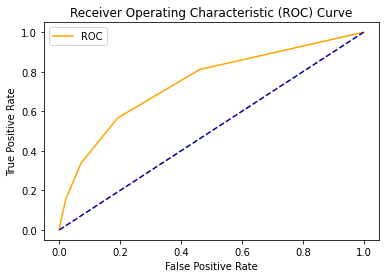

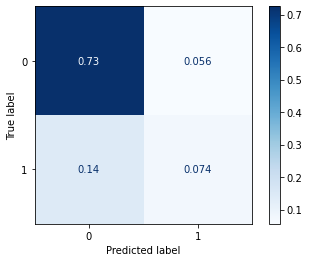

In [72]:
# Applying KNN model on data

model_dt = KNeighborsClassifier()
model_dt, accuracy_dt,  tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


<a id='decisiontree'></a>
# DecisionTree

Training set score: 88.84%
--
Accuracy = 81.15%
--
ROC Area under Curve = 0.6801732181953494
--
Time taken = 0.29937148094177246
--
Confusion Matrix

 [[20766  1960]
 [ 3523  2843]]
--


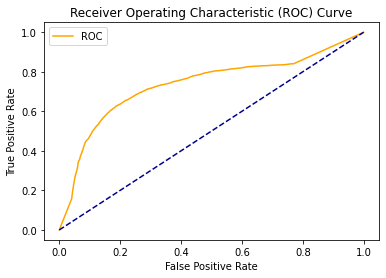

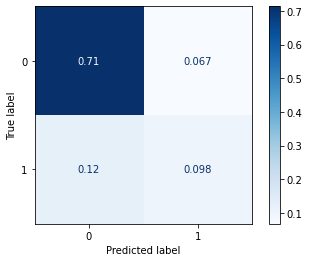

In [73]:
# Applying Decision Tree model on data
params_dt = {'max_depth': 20,
             'max_features': "sqrt",
            'splitter':'best',
            'max_leaf_nodes':None}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt,  tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier()

### Display Decision Tree

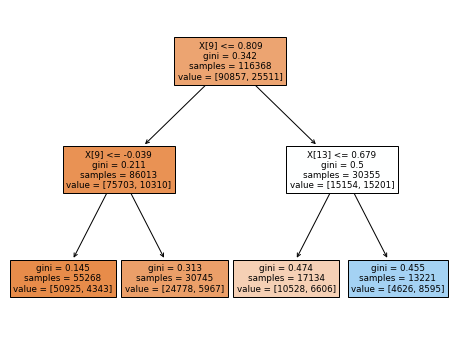

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=2, random_state=0)
fitted=dt.fit(X_train, y_train);

y_pred = dt.predict(X_test)


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text#both are new in 0.21
plt.figure(figsize= (8, 6))
plot_tree(fitted, filled=True);

<a id='naive'></a>
# Naïve Bayes

Training set score: 80.25%
--
Accuracy = 80.18%
--
ROC Area under Curve = 0.7068882850842096
--
Time taken = 0.353485107421875
--
Confusion Matrix

 [[19899  2827]
 [ 2940  3426]]
--


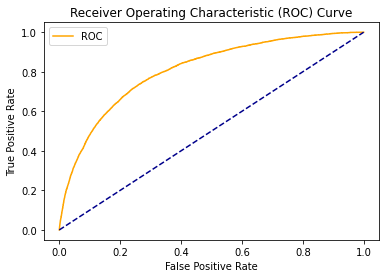

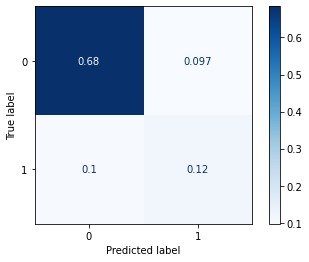

In [75]:
# Applying Naïve Bayes model on Data

params_dt = {'alpha': 0.1,
             'binarize': "6.0",
            'fit_prior':True}

model_dt = BernoulliNB(alpha=1,binarize=1,fit_prior=True)
model_dt, accuracy_dt,  tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

<a id='hyperparameters-tuning'></a>
# Hyperparameters Tuning

I will use **GridSearchCV** to find the best hyperparameters.
<br/>
So, what is it ?
<br/>
**Cross-Validation** (**CV**): Number of cross-validation you have to try for each selected set of hyperparameters.
<br/>
**Verbose**: You can set it to 1 to get the detailed print out while you fit the data to GridSearchCV at the end, you can select the best parameters from the listed hyperparameters

In [76]:
# Assume values for some paramaters

tree_params = param_dist = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth" : [33, 40, None],
    #'splitter' : ['best', 'random'],
    'max_features' : ['sqrt', 'log2'],
    #'random_state' : [4,5,6,7,8,9,None],
    #'max_leaf_nodes' : [5,6,7,8,9,None]
}
# apply gridsearch model 
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 4)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Accuracy =: {round(tree_grid.score(X_train, y_train) * 100, 2)}%')

print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Accuracy =: 93.3%
--
Best Parameters is {'criterion': 'entropy', 'max_depth': 33, 'max_features': 'log2'}
--
ROC Score is 0.6555668273565324
--
Recall Score is  0.42994030788564247
--
Confusion Matrix

 [[20026  2700]
 [ 3629  2737]]


### ROC curve

**roc curve :**is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied

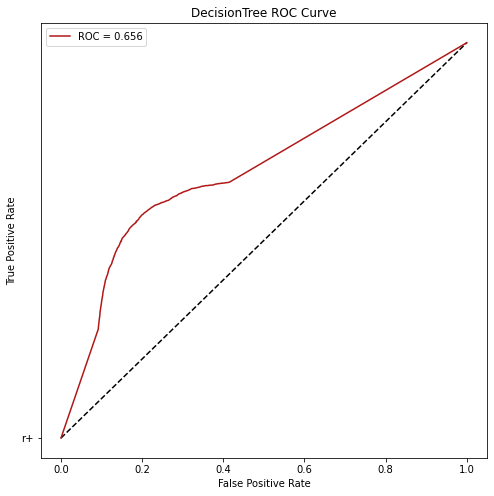

In [77]:
y_pred_prob = tree_grid.predict_proba(X_test)[:,1]

# Instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# Plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'ROC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTree ROC Curve")
plt.legend()
plt.show()

## Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called **Type I error**.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error**.

These four outcomes are summarized in a confusion matrix given below.

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20026  2700]
 [ 3629  2737]]

True Positives(TP) =  20026

True Negatives(TN) =  2737

False Positives(FP) =  2700

False Negatives(FN) =  3629


The confusion matrix shows 21314 + 2736 = 24050 correct predictions and 1412 + 3630 = 5050 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 21314


- True Negatives (Actual Negative:0 and Predict Negative:0) - 2736


- False Positives (Actual Negative:0 but Predict Positive:1) - 1412 (Type I error)


- False Negatives (Actual Positive:1 but Predict Negative:0) - 3630 (Type II error)

In [80]:
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
cm_matrix.head()

,Actual Positive:1,Actual Negative:0
Predict Positive:1,20026,2700
Predict Negative:0,3629,2737


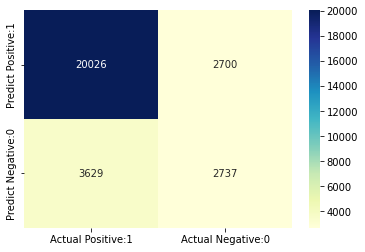

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.

In [81]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');